# Recommender Systems

### Libraries

In [31]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, accuracy, NormalPredictor, KNNBasic, SVD
from surprise.model_selection import train_test_split
from collections import Counter, defaultdict
from utils import load_filtered_data

### Reviews data

In [2]:
# major variables

city = 'Sicklerville'
city_data = load_filtered_data(city)

In [3]:
# data frame of business reviews by users

reviews = city_data['review'][['review_id', 'business_id', 'user_id', 'stars']]
reviews = reviews.groupby(['user_id', 'business_id'])['stars'].mean().reset_index()
reviews.columns = ['user_id', 'business_id', 'rating']

In [4]:
reviews.sample(5)

,user_id,business_id,rating
1703,PjkX2hneenPowUKSahmSVg,g3XizWCZY2FO4g-C5EWdyA,2.0
2276,Z3HnW1GZ2SafD1DpFQc6xA,2NLe7mbq_MpW4jXpV4VRYQ,5.0
3382,ovKD5cs5t_w5AoN_txDbqA,n1HOCV74TBVZdQdOUgp9xA,1.0
3671,tcTWVqBY2ayhj0EAJKM57w,BkI1EVigX4B6c8U4krAgNw,1.0
3220,mIDpLNdfaKVa1apOGEYkeg,rnioJAG4aQp2TJHUxLy7CQ,2.0


In [5]:
# number of ratings

len(reviews['rating'])

4094

In [6]:
# number of users who have reviewed

len(reviews['user_id'].unique())

2890

In [7]:
# ratings statistics

reviews['rating'].describe()

count    4094.000000
mean        3.247232
std         1.661954
min         1.000000
25%         1.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

<Axes: >

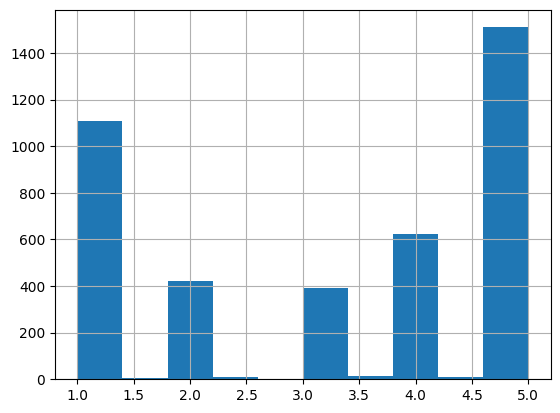

In [8]:
# ratings distribution

reviews['rating'].hist()

### User-business matrix

In [9]:
# city matrix

city_matrix = reviews.pivot(index='user_id', columns='business_id', values='rating')

In [10]:
city_matrix.sample(5)

business_id,-7AGjO0qnOld_GZK9dNNkQ,-O_IkEBfG-63san1Pwg2Tg,-wmCy-08MGD53pAioLQpaA,0p7kYtoqwJScvJjMjXYr7w,0pL-eq0ufX5jMDgVAvoHHw,1c1X6tTyStXlVQMFBjQOAg,1xa6BsH1LT0AZ7ozLmiQAg,2NLe7mbq_MpW4jXpV4VRYQ,2jy1GXVEHFIZZDV9rNBzcQ,2nnVlm-_T4wk1qOpycifPA,...,wn1rS1Ga9xZ1BIMffnJW5A,wsWVhlQ3xKxkl5eQAJAWaQ,wuoYvojFNWuRrUO2UyM47Q,y0QsaS-8-2Jm2x1IIAaqhA,y2DM2FCChCCoCNF5hxUk5A,y7Iy-q_iWackvOGQeiRAgw,yR1QRMQ6jnDdvFfu6v_Rig,yni7QxA0Hgw5PbgR4NxKHw,z26EC8QvYCn5aeSgepYK9g,zrd6bulYNAKhCdSVtJ8aXQ
user_id,,,,,,,,,,,,,,,,,,,,,
qf1iZVotfhZ0lndKS1tv1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iliPyjM1n5TMV6QaCfCNIQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5oVk8nAnMiBXepllZz07ag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hX6TlRle2_Gc0j-IWUJdbg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hbSa1RpUO6Ka-AKnfmCF_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# city matrix sparsity

print(f"{city_matrix.notnull().sum().sum() / (city_matrix.shape[0] * city_matrix.shape[1]):.2%}")

0.89%


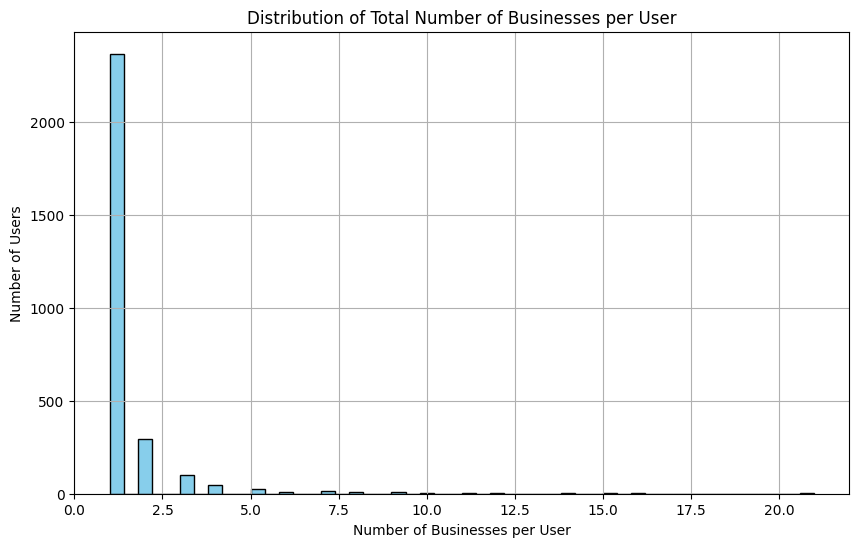

In [12]:
# distribution of total number of items per user

businesses_per_user = city_matrix.notnull().sum(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(businesses_per_user, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Number of Businesses per User')
plt.xlabel('Number of Businesses per User')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

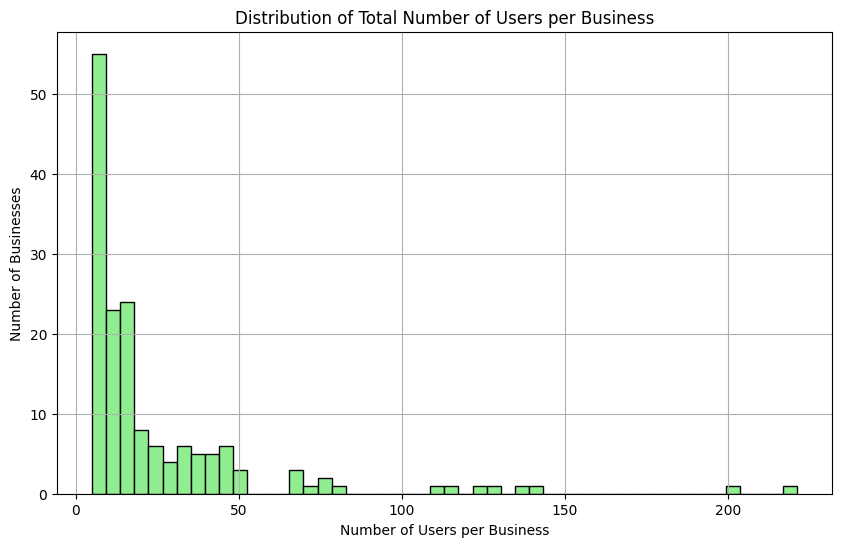

In [13]:
# distribution of total number of users per business

users_per_business = city_matrix.notnull().sum()
plt.figure(figsize=(10, 6))
plt.hist(users_per_business, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Number of Users per Business')
plt.xlabel('Number of Users per Business')
plt.ylabel('Number of Businesses')
plt.grid(True)
plt.show()

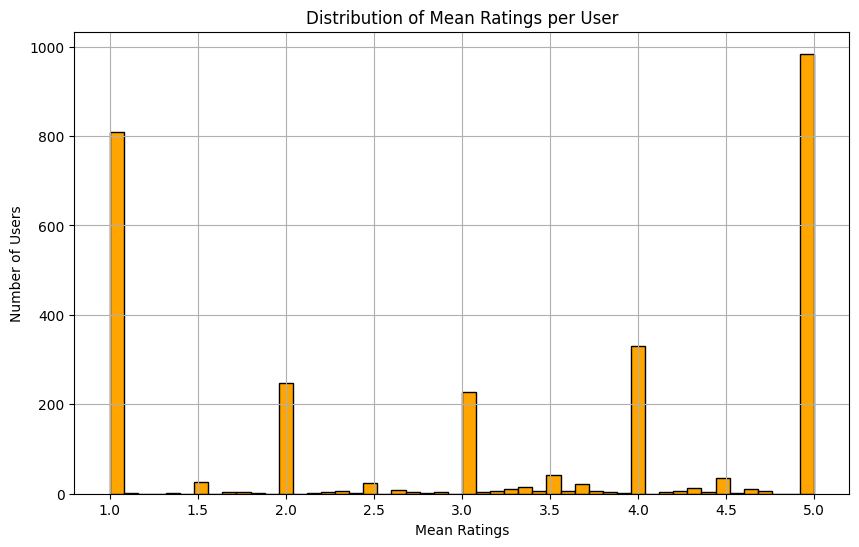

In [14]:
# distribution of mean ratings per user

mean_ratings_per_user = city_matrix.mean(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(mean_ratings_per_user, bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Mean Ratings per User')
plt.xlabel('Mean Ratings')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

### Community matrices

In [15]:
# user-business matrix for each community

connection = 'combined'
with open(f'communities/Sicklerville_{connection}_communities.json') as f:
    data = json.load(f)

community_matrices = {}
for i, community in enumerate(data['communities']):
    community_matrices[i] = reviews[reviews['user_id'].isin(community)]
    community_matrices[i] = community_matrices[i].pivot_table(index='user_id', columns='business_id', values='rating')

In [16]:
community_matrices[0].sample(5)

business_id,91LdySqWT-DHTlznXwoM_A,AasKQGcM5ufqpGAsJQT5kg,BI8pacRkqfXV4RAbzvSQVQ,Bw2X8gqOouIIznH2x_bLeQ,FBf4fTg9BZrDYxCWTUfdFQ,FHwIc6ckq2ySPW2WTFgdQA,FccglnZhRNkD1S-U7A8XRA,FtFRMb7Wj8ok8VgFvQXASw,H061rGK0tKh5H_T104vz1A,IAjKQ5xmNZiK2k9l5cjKyA,...,nyBwpaP_eXPvxj_BcL7rog,oGDLaTRLPLz-R_KyQ3TzPA,ocdP7OwgygPKPMSqrC4e5g,s4eTJGMrxmnet8FYTOXOtw,uditup-1TERI2xu76N0V5Q,wn1rS1Ga9xZ1BIMffnJW5A,wuoYvojFNWuRrUO2UyM47Q,y0QsaS-8-2Jm2x1IIAaqhA,y2DM2FCChCCoCNF5hxUk5A,yni7QxA0Hgw5PbgR4NxKHw
user_id,,,,,,,,,,,,,,,,,,,,,
Aa96D7vv6JL-gN-BsNFY6w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
_9qGWXPtC-EYQulTgXImmQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
qCxWgO3R69IGNw-kGh4FRg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
RSeEir7BUb5pG4AksE55RA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uaTzVaBACpuFvAE5eFVoKw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# data sparsity

sparsity = {}

for community_id, matrix in community_matrices.items():
    sparsity[community_id] = matrix.notnull().sum().sum() / (matrix.shape[0] * matrix.shape[1])

for community_id, sparsity_value in sparsity.items():
    print(f"Community {community_id}: {sparsity_value:.2%} sparsity")

Community 0: 3.00% sparsity
Community 1: 2.10% sparsity
Community 2: 2.21% sparsity
Community 3: 2.25% sparsity
Community 4: 100.00% sparsity
Community 5: 3.22% sparsity
Community 6: 3.15% sparsity
Community 7: 12.31% sparsity
Community 8: 3.38% sparsity
Community 9: 2.71% sparsity
Community 10: 2.63% sparsity
Community 11: 11.01% sparsity
Community 12: 3.74% sparsity
Community 13: 100.00% sparsity
Community 14: 8.70% sparsity
Community 15: 2.67% sparsity
Community 16: 2.48% sparsity
Community 17: 51.39% sparsity
Community 18: 100.00% sparsity
Community 19: 3.77% sparsity
Community 20: 2.82% sparsity
Community 21: 26.14% sparsity


### Train and test sets

In [18]:
# split into train and test set for each community

community_trainsets = {}
community_testsets = {}

for community_id, matrix in community_matrices.items():
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(matrix.unstack().reset_index(), reader)

    train_data, test_data = train_test_split(data, test_size=0.2)
    community_trainsets[community_id] = train_data
    community_testsets[community_id] = test_data

In [19]:
# trainsets statistics

for community_id, trainset in community_trainsets.items():
    print(f"Community {community_id}: {len(trainset.all_users())} users")

    businesses_per_user = [len(trainset.ur[user_id]) for user_id in trainset.all_users()]
    print(f"Average number of businesses per user: {np.mean(businesses_per_user):.2f}")

    users_per_business = [len(trainset.ir[business_id]) for business_id in trainset.all_items()]
    print(f"Average number of users per business: {np.mean(users_per_business):.2f}")

    mean_ratings_per_user = [np.mean([ratings for (_, ratings) in trainset.ur[user_id]]) for user_id in trainset.all_users()]
    print(f"Average mean ratings per user: {np.mean(mean_ratings_per_user):.2f}")

    ratings_distribution = [ratings for (_, _, ratings) in trainset.all_ratings()]
    print(f"Average ratings: {np.mean(ratings_distribution):.2f}")

    print("\n")

Community 0: 40 users
Average number of businesses per user: 169.60
Average number of users per business: 32.00
Average mean ratings per user: nan
Average ratings: nan


Community 1: 84 users
Average number of businesses per user: 201.60
Average number of users per business: 67.20
Average mean ratings per user: nan
Average ratings: nan


Community 2: 84 users
Average number of businesses per user: 185.60
Average number of users per business: 67.20
Average mean ratings per user: nan
Average ratings: nan


Community 3: 70 users
Average number of businesses per user: 155.20
Average number of users per business: 56.00
Average mean ratings per user: nan
Average ratings: nan


Community 4: 1 users
Average number of businesses per user: 11.00
Average number of users per business: 1.00
Average mean ratings per user: 2.45
Average ratings: 2.45


Community 5: 39 users
Average number of businesses per user: 122.38
Average number of users per business: 31.20
Average mean ratings per user: nan
Aver

In [20]:
# 2 most popular businesses in each community

for community_id, trainset in community_trainsets.items():
    business_ratings_count = Counter([len(trainset.ir[business_id]) for business_id in trainset.all_items()])
    most_popular_businesses = business_ratings_count.most_common(2)

    print(f"\nMost popular businesses in Community {community_id}:")
    for business_id, count in most_popular_businesses:
        print(f"Business ID: {business_id}, Number of Ratings: {count}")


Most popular businesses in Community 0:
Business ID: 33, Number of Ratings: 35
Business ID: 32, Number of Ratings: 33

Most popular businesses in Community 1:
Business ID: 68, Number of Ratings: 30
Business ID: 67, Number of Ratings: 26

Most popular businesses in Community 2:
Business ID: 68, Number of Ratings: 30
Business ID: 69, Number of Ratings: 26

Most popular businesses in Community 3:
Business ID: 57, Number of Ratings: 25
Business ID: 55, Number of Ratings: 23

Most popular businesses in Community 4:
Business ID: 1, Number of Ratings: 11

Most popular businesses in Community 5:
Business ID: 32, Number of Ratings: 25
Business ID: 31, Number of Ratings: 22

Most popular businesses in Community 6:
Business ID: 33, Number of Ratings: 25
Business ID: 34, Number of Ratings: 23

Most popular businesses in Community 7:
Business ID: 7, Number of Ratings: 26
Business ID: 8, Number of Ratings: 24

Most popular businesses in Community 8:
Business ID: 36, Number of Ratings: 19
Business I

### Popularity

In [21]:
def popular_recommendations(trainset, top_n=10):
    '''
    Returns the top n most popular businesses in the trainset
    '''
    business_counts = defaultdict(int)
    for _, business_id, _ in trainset.all_ratings():
        business_counts[business_id] += 1

    popular_businesses = sorted(business_counts.items(), key=lambda x: x[1], reverse=True)
    top_n = popular_businesses[:top_n]
    return [trainset.to_raw_iid(i) for i, _ in top_n]

In [23]:
# most popular businesses in each community

for community_id, trainset in community_trainsets.items():
    popular_businesses = popular_recommendations(trainset, 5)
    print(f"Community {community_id}: {popular_businesses}")

Community 0: ['xAlqzAgqorS1DvKcvoTkGA', 'hN03Wim4nDQ-824277aEsQ', '6pbNMgTnSYrtPHDN07IXwA', 'uaTzVaBACpuFvAE5eFVoKw', 'dBO81OPqd7G_m2YNq89wKw']
Community 1: ['E7zzPAC-TbSB1nuVe03dTQ', '6F5x1WKRJt9Ard9SyG8dUw', 'RHBEH_PAHLXaX8qeAe8_gQ', 'nC38NrFqfx5DsC7k-hevdQ', 'wpfvF8ue3yr1m5xD4OrZNw']
Community 2: ['hWLiL5dSXxdqr3SK4untfQ', 'RfILazdFKrVLORCHLRtzuw', 'XD42ic6KVHUz24hQtSLFUA', 'jEi6NTDa49atuLr033_l4Q', 'GCzviAIXrn-Od4bU84hU8A']
Community 3: ['IwoWjfWBQzDerFit0wP8Wg', 'xrv39K6uFSItvOr3cHKESA', 'RMy8XE0a-6rg0o_sOhWlZw', 'f9Rctm5qovR-5fMUQk6Ziw', 'qHwPZFwYyXvuos2cHrZmmw']
Community 4: ['hcd6nwigGcfM4BQHrKp7CQ', '0JY4u0EteQH2DDY2iheF6Q', 'sEsCrfzrwegDwaKSKTXH_A', 's5yW7YZQtmnQo9fCXk4e6w', 'WbOpKvE_WoAKtuBh5dg_Gg']
Community 5: ['T1BFiPCI5R4rE1bRe8nuMg', 'kF_-_vLfDRdyvBS91ac1vQ', 'nUESAKJCrcqAxhuvF_jstA', 'wJ2q8vOX-0U06LB2Di3DVw', 'CBk3GqDIhAxm1Sm5uWZynA']
Community 6: ['L8yvMRYSyNk4kyiqMBmj8g', '1s3LbcpNc7MILx62mL9BVA', 'vTpRtybdZ0XoHsgcDe12mA', 'pkg1pEIPCBP7CXtnAkOyQw', 'gOFUb5o9JsPl1m40S

### Modelling

In [25]:
def evaluate_algorithm(algo, trainset, testset):
    '''
    Evaluate the algorithm using RMSE
    '''
    algo.fit(trainset)
    predictions = algo.test(testset)
    
    rmse = accuracy.rmse(predictions)
    return rmse

In [27]:
# random recommender for each community

random_algo = NormalPredictor()
for community_id, trainset in community_trainsets.items():
    testset = community_testsets[community_id]
    random_rmse = evaluate_algorithm(random_algo, trainset, testset)

RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: 2.2945
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: 0.0000
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: 1.3353
RMSE: nan
RMSE: nan
RMSE: nan


In [29]:
# user-based collaborative filtering for each community

ubcf_algo = KNNBasic(sim_options={'user_based': True})
for community_id, trainset in community_trainsets.items():
    testset = community_testsets[community_id]
    ubcf_rmse = evaluate_algorithm(ubcf_algo, trainset, testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4545
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
C

In [30]:
# item-based collaborative filtering for each community

ibcf_algo = KNNBasic(sim_options={'user_based': False})
for community_id, trainset in community_trainsets.items():
    testset = community_testsets[community_id]
    ibcf_rmse = evaluate_algorithm(ibcf_algo, trainset, testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4545
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: nan
C

In [32]:
# Singular Value Decomposition (SVD) for each community

svd_algo = SVD()
for community_id, trainset in community_trainsets.items():
    testset = community_testsets[community_id]
    svd_rmse = evaluate_algorithm(svd_algo, trainset, testset)

RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: 1.4153
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: 0.0083
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: nan
RMSE: 0.9777
RMSE: nan
RMSE: nan
RMSE: nan


In [33]:
print(f"Random RMSE: {random_rmse:.3f}")
print(f"User-Based CF RMSE: {ubcf_rmse:.3f}")
print(f"Item-Based CF RMSE: {ibcf_rmse:.3f}")
print(f"SVD RMSE: {svd_rmse:.3f}")

Random RMSE: nan
User-Based CF RMSE: nan
Item-Based CF RMSE: nan
SVD RMSE: nan


### Top recommendations

In [ ]:
# TODO